<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

# Q1

In [2]:
!git clone https://github.com/DS3001/linearRegression/

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

In [5]:
df.columns = df.columns.str.strip()
Neighbourhood_groups = df.groupby(df['Neighbourhood'])
Neighbourhood_groups['Price'].mean()
#the most expensive neigborhood to live in is Manhattan

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


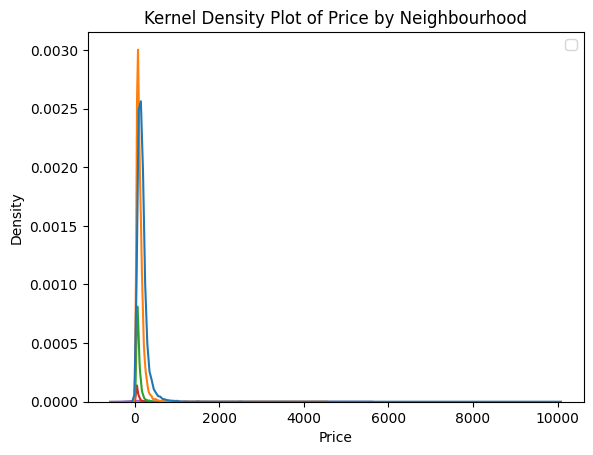

In [9]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood'])

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.legend()
plt.show()

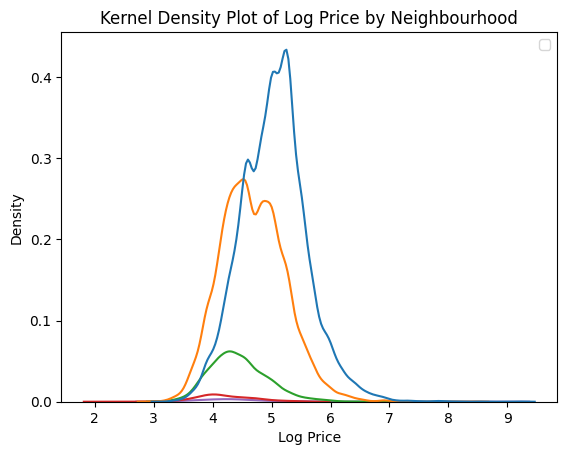

In [11]:
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood'])

plt.xlabel('Log Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.legend()
plt.show()

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [13]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


the coefficents are the means of the grouped variable. so the coefficent for each neigborhood is the average price for that neigborhood.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [15]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


When creating the dummies I have to drop the first one, so that variable will be represented by the intercet. then each of the other coefficents are the difference between the average price from the dropped dummy variable and the average price at in the nigborhood the coeffient is representing.  

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
X = pd.get_dummies(X, columns=['Neighbourhood'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=150) # For replication purposes

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R-squared:  0.07129400048920465
RMSE:  119.28064173660843


,variable,coefficient
0,Review Scores Rating,1.057851
1,Neighbourhood_Bronx,-20.884785
2,Neighbourhood_Brooklyn,31.082188
3,Neighbourhood_Manhattan,87.373810
4,Neighbourhood_Queens,-0.849490
5,Neighbourhood_Staten Island,55.838416


the coefficient on Review Scores Rating is 1.057851 and the most expensive property you can rent is a property in manhattan with a review of 100

5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [25]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood','Property Type'] ]
X = pd.get_dummies(X, columns=['Neighbourhood','Property Type'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=150) # For replication purposes
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R-squared:  0.08139385570512137
RMSE:  118.63026878386515


,variable,coefficient
0,Review Scores Rating,1.047519e+00
1,Neighbourhood_Bronx,-3.050618e+01
2,Neighbourhood_Brooklyn,2.852478e+01
3,Neighbourhood_Manhattan,9.019437e+01
4,Neighbourhood_Queens,-5.013281e+00
5,Neighbourhood_Staten Island,3.851481e+01
6,Property Type_Apartment,-3.581001e+00
7,Property Type_Bed & Breakfast,-3.004754e+01
8,Property Type_Boat,4.758182e+01
9,Property Type_Bungalow,2.507021e+01


the coefficent of review score rating is 1.047519. the most expensive type of property you can rent is a Condominium in Manhattan with a rating of 100

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works

the coefficient on Review Scores Rating means the rate at which the price would change given a one unit change in the score. it changes from part 4 to 5 because there are more explanatory variables included in the model which affect the prediction for y.

7. (Optional) We've included Neighborhood and Property Type separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus Review Scores Rating. How does the slope coefficient for Review Scores Rating, the  𝑅2 , and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? What is the most expensive kind of property you can rent?

In [30]:
y = df['Price']
df['property_neighborhood'] = df['Neighbourhood'].astype('str')+'X'+df['Property Type'].astype('str')
X = df.loc[:,['Review Scores Rating', 'property_neighborhood'] ]
X = pd.get_dummies(X, columns=['property_neighborhood'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.08186343343357194
RMSE:  124.01188291277131


,variable,coefficient
0,Review Scores Rating,1.000849e+00
1,property_neighborhood_BronxXApartment,-1.296842e+01
2,property_neighborhood_BronxXBed & Breakfast,-3.508487e+01
3,property_neighborhood_BronxXCondominium,4.693210e+01
4,property_neighborhood_BronxXHouse,-1.930745e+01
5,property_neighborhood_BronxXLoft,6.672341e+00
6,property_neighborhood_BronxXTownhouse,1.692107e+01
7,property_neighborhood_BrooklynXApartment,3.116479e+01
8,property_neighborhood_BrooklynXBed & Breakfast,9.219870e-01
9,property_neighborhood_BrooklynXBoat,4.919370e+00


R-squared increases very slightly and the slope coefficient for Review Scores Rating goes down a little, but neither change significantly from part 5. No they are not just the sum of oefficients for Neighbourhood and Property Type from 5 because we can see the specifics of the price for each property type within each neigborhood. The most expensive property you can rent is a Boat in Queens that has a 100 rating.

# Q x

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?